<a href="https://colab.research.google.com/github/NataliaLak/Test_task/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Создать прогностическую модель рисков беременных.**

In [3]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

**Мы можем рассматривать эту задачу как задачу классификации, где "Risk Level" является целевой переменной. "Risk Level" категориальная переменная, поэтому для оценки модели подходят такие метрики, как точность (Accuracy), F1-мера**

In [14]:
#подготовка данных
data_encoded = pd.get_dummies(data, columns=['RiskLevel'], prefix='Risk')

In [15]:
X = data_encoded.drop(['Risk_low risk', 'Risk_mid risk', 'Risk_high risk'], axis=1) # Входные атрибуты
y = data_encoded[['Risk_low risk', 'Risk_mid risk', 'Risk_high risk']] # Целевая переменная

In [16]:
#разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
#предсказание на тренировочном и тестовом наборах данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
#вычисление метрик на тренировочном наборе
train_accuracy = accuracy_score(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1))
train_f1 = f1_score(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1), average='weighted')
train_conf_matrix = confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1))

In [21]:
#на тестовом наборе
test_accuracy = accuracy_score(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))
test_f1 = f1_score(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1), average='weighted')
test_conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))

In [22]:
#вывод метрик на тестовом наборе
print("Training Metrics:")
print("Train Accuracy:", train_accuracy)
print("Train F1 Score:", train_f1)
print("Train Confusion Matrix:\n", train_conf_matrix)

Training Metrics:
Train Accuracy: 0.935881627620222
Train F1 Score: 0.9358909953034595
Train Confusion Matrix:
 [[301  22   3]
 [ 12 239   9]
 [  2   4 219]]


In [26]:
#вывод метрик на тренировочном наборе
print("\nTesting Metrics:")
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Test Confusion Matrix:\n", test_conf_matrix)


Testing Metrics:
Test Accuracy: 0.8325123152709359
Test F1 Score: 0.8326418697956784
Test Confusion Matrix:
 [[64 13  3]
 [ 9 64  3]
 [ 2  4 41]]


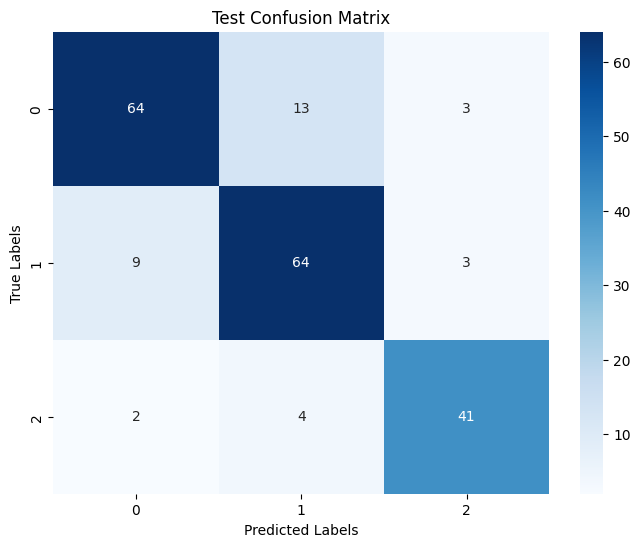

In [25]:
#создание графика матрицы ошибок на тестовом наборе
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

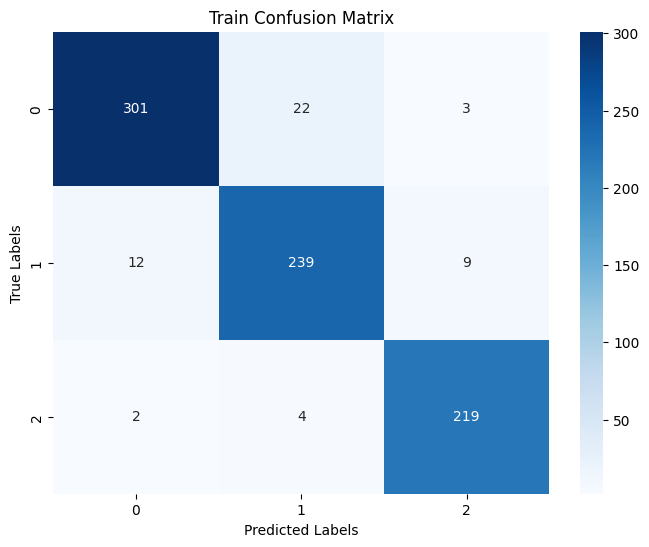

In [27]:
#создание графика матрицы ошибок на тренировочном наборе
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Анализ:

Модель демонстрирует высокую точность на трейне (93.59%), что говорит о ее способности обучаться на данных.
F1-мера на трейне также высокая (93.59%), что указывает на сбалансированность модели между точностью и полнотой.
Точность на тесте (83.25%) несколько ниже, чем на трейне, но все же остается достаточно высокой.
F1-мера на тесте (83.26%) также немного ниже, чем на трейне, но это говорит о том, что модель обобщает знания на новые данные.
Матрица ошибок на тесте показывает, что модель чаще всего ошибается при классификации беременных с низким риском как имеющих средний риск.

На тесте:
Матрица ошибок показывает, что модель правильно классифицировала 64 беременные с низким риском, 64 беременные со средним риском и 41 беременную с высоким риском.
Модель ошиблась в 13 случаях при классификации беременных с низким риском, в 9 случаях при классификации беременных со средним риском и в 4 случаях при классификации беременных с высоким риском.

На трейне:
Матрица ошибок показывает, что модель правильно классифицировала 301 беременную с низким риском, 239 беременных со средним риском и 219 беременных с высоким риском.
Модель ошиблась в 22 случаях при классификации беременных с низким риском, в 12 случаях при классификации беременных со средним риском и в 4 случаях при классификации беременных с высоким риском.
